                                                           
                                                           .___  ___.   ______    _______   _______  __                                                 
                                                           |   \/   |  /  __  \  |       \ |   ____||  |                                                
                                                           |  \  /  | |  |  |  | |  .--.  ||  |__   |  |                                                
                                                           |  |\/|  | |  |  |  | |  |  |  ||   __|  |  |                                                
                                                           |  |  |  | |  `--'  | |  '--'  ||  |____ |  `----.                                           
                                                           |__|  |__|  \______/  |_______/ |_______||_______|                                           
                                                                                                                                                        
                                                            _______ .__   __.      _______. _______ .___  ___. .______    __       _______ .______      
                                                           |   ____||  \ |  |     /       ||   ____||   \/   | |   _  \  |  |     |   ____||   _  \     
                                                           |  |__   |   \|  |    |   (----`|  |__   |  \  /  | |  |_)  | |  |     |  |__   |  |_)  |    
                                                           |   __|  |  . `  |     \   \    |   __|  |  |\/|  | |   _  <  |  |     |   __|  |      /     
                                                           |  |____ |  |\   | .----)   |   |  |____ |  |  |  | |  |_)  | |  `----.|  |____ |  |\  \----.
                                                           |_______||__| \__| |_______/    |_______||__|  |__| |______/  |_______||_______|| _| `._____|
                                                                                                                                                        
                                                           

In [52]:
from IPython.core.display import display, HTML,display_html
display(HTML("<style>.container { width:100% !important; }</style>"))
import ipywidgets as widgets
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from ipywidgets import interact, interact_manual
from IPython.display import display, Markdown, clear_output
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
my_cmap = sns.light_palette("Red", as_cmap=True)
my_cmap = sns.light_palette("Green", as_cmap=True)

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [53]:
from model_func import *

#### VARIABLE AND DATABASE CONFIGURATION

In [7]:
# read base:
df = pd.read_csv('qbins_models.csv',encoding='latin-1')
# Randomly generated just to make an example
df['SWAP'] = np.random.randint(0,2,891)

In [11]:
df.columns

Index(['index', 'survived', 'random_forest', 'xgboost', 'qRF', 'qXG', 'SWAP'], dtype='object')

In [8]:
# Target Variable of your model. Remember that the code does not accept Missing or values other than 0 or 1.
VAR_TARGET = 'survived'

In [24]:
assert df[VAR_TARGET].max() == 1 and df[VAR_TARGET].min() == 0, "Error in your TARGET column. Please verify."

In [34]:
column_axis_y = 'qRF'
# The code automatically tries to adjust the table, but sometimes it is not possible. So if you want, put the list below or leave as None
ratings_axis_y = None
# Could be any rating, if python doesnt sort it, you can input it by hand
#ratings_axis_y = ['Baa2','Ba1 ', 'Ba2 ', 'Ba3 ', 'Ba4 ', 'Ba6 ', 'B1  ', 'B2  ', 'B3  ', 'B4  ', 'C1  ', 'C2  ', 'C3  ', 'D1  ', 'D2  ', 'D3  ', 'D4  ', 'E1  ', 'E2  ', 'E3  ', 'F1  ']
ratings_axis_y = list(np.arange(10))

In [35]:
column_axis_x = 'qXG'
# The code automatically tries to adjust the table, but sometimes it is not possible. So if you want, put the list below or leave as None
ratings_axis_x = None
# Could be any rating, if python doesnt sort it, you can input it by hand
#ratings_axis_x = ['G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9','G10', 'G11', 'G12']
ratings_axis_x = list(np.arange(10))

In [36]:
var_swap = None # Caso não se queira medir swapin, swapout, inin, inout DEIXAR A VARIÁVEL COMO None
var_swap = 'SWAP'

#### END OF VARIABLE CONFIGURATION

# Show your model thresholds

In [37]:
show_simple_models_thresholds(df,column_axis_y,ratings_axis_y,column_axis_x,ratings_axis_x,VAR_TARGET)

,LimiarMax,BAD(%),POP(%)
0,0,0.000000,0.102132
1,1,0.000000,0.200898
2,2,0.027778,0.323232
3,3,0.041551,0.405163
4,4,0.060538,0.500561
5,5,0.083799,0.602694
6,6,0.148325,0.703704
7,7,0.230014,0.800224
8,8,0.315461,0.900112
9,9,0.383838,1.000000


In [40]:
matrizbadfinal, matrizbadpop, matrizpop = create_support_matrices(df[df[var_swap] == 1],VAR_TARGET,column_axis_y,column_axis_x,indexmodel1=ratings_axis_y,
                                                    indexmodel2=ratings_axis_x)

In [41]:
# Defino 1 para quem já é ININ e 0 para quem seria Out IN
if var_swap != None:
    _, matrizbadswap1, matrizpopswap1 = create_support_matrices(df[df[var_swap] == 1],VAR_TARGET,column_axis_y,column_axis_x,indexmodel1=ratings_axis_y,
                                                        indexmodel2=ratings_axis_x)
    _, matrizbadswap0, matrizpopswap0 = create_support_matrices(df[df[var_swap] == 0],VAR_TARGET,column_axis_y,column_axis_x,indexmodel1=ratings_axis_y,
                                                        indexmodel2=ratings_axis_x)

## Automatic Threshold Creation

,Limiar_Seguerido,BAD(%),POP(%)
0,0 0,0.0,0.058691
11,1 1,0.0,0.076749
19,1 9,0.0,0.205418
18,1 8,0.0,0.205418
17,1 7,0.0,0.205418


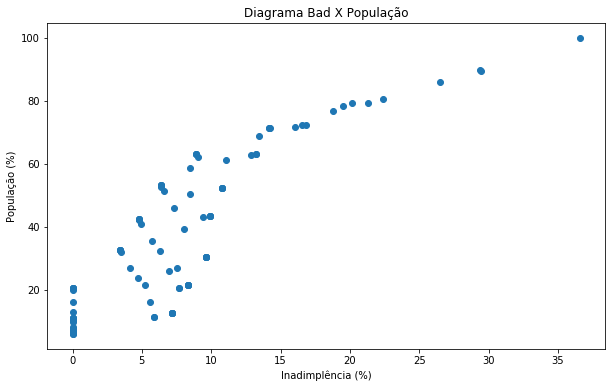

In [54]:
#                                 Dont change    Dont change  Here you can put your maximum Threshold in %
resultados = generate_thresholds(matrizbadfinal, matrizpop,                          2)

In [43]:
import gc
gc.collect()

2440

# Manual Adjustment

In [44]:
#RODAR ESSA CASELA ATÉ TODA MATRIZ APARECER
grid = create_grid(matrizbadfinal,resultados)
grid

GridspecLayout(children=(Text(value='0', disabled=True, layout=Layout(grid_area='widget001', width='100px')), …

In [47]:
button = widgets.Button(description="Update")
out = widgets.Output()

def on_button_clicked(b):
    with out:
        clear_output(True)
        show_pol(grid,matrizbadfinal,matrizbadpop,matrizpop,matrizbadswap0,matrizpopswap0,matrizbadswap1,matrizpopswap1,var_swap,my_cmap)
button.on_click(on_button_clicked)

display(button)

with out:
    show_pol(grid,matrizbadfinal,matrizbadpop,matrizpop,matrizbadswap0,matrizpopswap0,matrizbadswap1,matrizpopswap1,var_swap,my_cmap)
    #show()

out

Button(description='Update', style=ButtonStyle())

Output()

## Saving your Policy in the Notebook

In [49]:
#EXECUTAR ESSA CASELA PARA SALVAR O ESTADO DE CONFIGURAÇÃO DA POLÍTICA
show_pol_2(grid,matrizbadfinal,matrizbadpop,matrizpop,matrizbadswap0,matrizpopswap0,matrizbadswap1,matrizpopswap1,var_swap,my_cmap)

,%
IN,9.139785
OUT,56.420233
SWAP_IN,6.214689
SWAP_OUT,56.420233
IN_IN,9.139785
OUT_OUT,62.361624
,%
POP. IN,41.986456
POP. OUT,58.013544
POP. SWAPIN,39.508929
